# Goals

This is mainly for me to load in the data I'm using and visualize it in different ways

**Data in use**

- COSMOS2020:
    - *Description* --- Photometric catalog
    - *Shape* --- (1720700,753)
    - *Useful Columns* ---

    |Python_ID|Ref_Name|Description|
    |:---:|:---:|:---:|
    |0|ID|COSMOS2020 ID|
    |1|ALPHA_J2000| RA (deg)|
    |2|DELTA_J2000| Dec (deg)|
    |594|lp_type|LePhare type (0: galaxy, 1: star, 2: Xray sour., -9: failure in fit)|
    |595|lp_zPDF|Median photo-z using the galaxy templ., median of likelihood distr.|
    |596|lp_zPDF_l68|Lower 68% confidence interval from PDF|
    |597|lp_zPDF_u68|Upper 68% confidence interval from PDF|
    |624|lp_mass_med|Median LePhare BC03 log stellar mass at zPDF|
    |625|lp_mass_med_min68|Lower 68% LePhare BC03 log stellar mass at zPDF|
    |626|lp_mass_med_max68|Upper 68% LePhare BC03 log stellar mass at zPDF|
    |628|lp_SFR_med|LePhare BC03 log SFR at zPDF|
    |629|lp_SFR_med_min68|LePhare BC03 log SFR at zPDF, lower limit, 68% confidence level|
    |630|lp_SFR_med_max68|LePhare BC03 log SFR at zPDF, upper limit, 68% confidence level|
 

In [1]:
### Imports ###
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [31]:
### Load in Catalog Data ###

# Cosmos
cosmos_file = fits.open(r"C:/Users/sikor/OneDrive/Desktop/BigData/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0.fits")
c_head = cosmos_file[0].header
cosmos_head = cosmos_file[1].header
cosmos = cosmos_file[1].data

# Spec-z catalog
specz_cat = np.loadtxt("./Data/master_specz_COSMOS_BF_v4b.cat", dtype=object)   # Load in the data
for col in range(specz_cat.shape[1]):
    # Convert valid data to floats
    if col not in (1, 2, 14): specz_cat[:,col] = specz_cat[:,col].astype(np.float64)

print(f"Shape of COSMOS2020: {cosmos.shape}")
print(f"Shape of zCOSMOS: {specz_cat.shape}")

Shape of COSMOS2020: (1720700,)
Shape of zCOSMOS: (42776, 32)


In [52]:
search = np.where(cosmos["lp_type"] == 0)[0]
print(search.shape)

(1677646,)


In [39]:
cosmos[:,594]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [27]:
print(cosmos[500][631])

0.9963


C:\Users\sikor\AppData\Local\Temp\ipykernel_20268\3686355970.py:6: RuntimeWarning: invalid value encountered in greater
  photz = np.where((specz_cat[:,12] > 0))


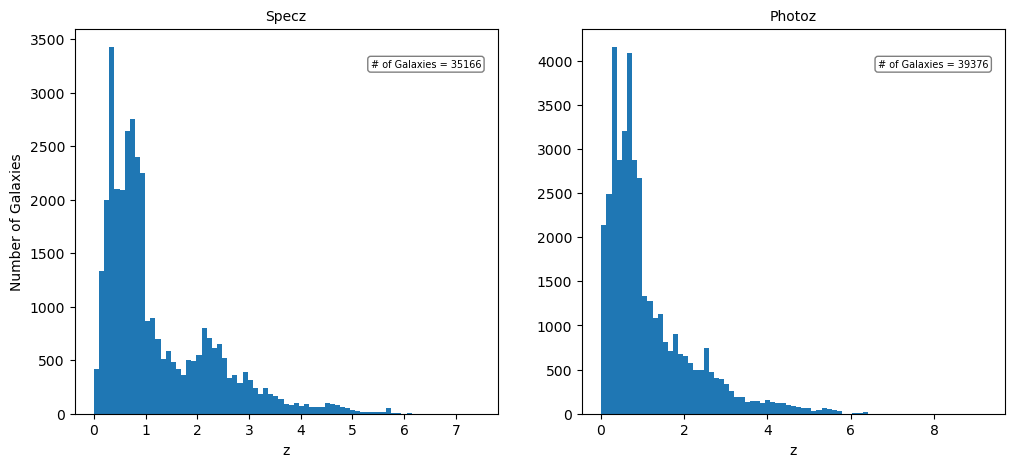

In [4]:
### Total Redshift Distribution ###
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,5)

specz = np.where((specz_cat[:,11] > 0))
photz = np.where((specz_cat[:,12] > 0))

ax[0].hist(specz_cat[:,11][specz], bins=75)
ax[0].set_xlabel("z")
ax[0].set_ylabel("Number of Galaxies")
ax[0].set_title(f"Specz", fontsize=10)
bbox = dict(boxstyle='round', fc = "white", ec='k', alpha=0.5)
ax[0].text(0.7, 0.9, f"# of Galaxies = {len(specz_cat[:,11][specz])}", fontsize=7,
                    bbox=bbox,transform=ax[0].transAxes)

ax[1].hist(specz_cat[:,12][photz], bins=75)
ax[1].set_xlabel("z")
ax[1].set_title(f"Photoz", fontsize=10)
bbox = dict(boxstyle='round', fc = "white", ec='k', alpha=0.5)
ax[1].text(0.7, 0.9, f"# of Galaxies = {len(specz_cat[:,12][photz])}", fontsize=7,
                    bbox=bbox,transform=ax[1].transAxes)

plt.show()

C:\Users\sikor\AppData\Local\Temp\ipykernel_20268\863208820.py:12: RuntimeWarning: invalid value encountered in greater
  photz = np.where((specz_cat[:,12] > 0)  & (specz_cat[:,2] == survey))


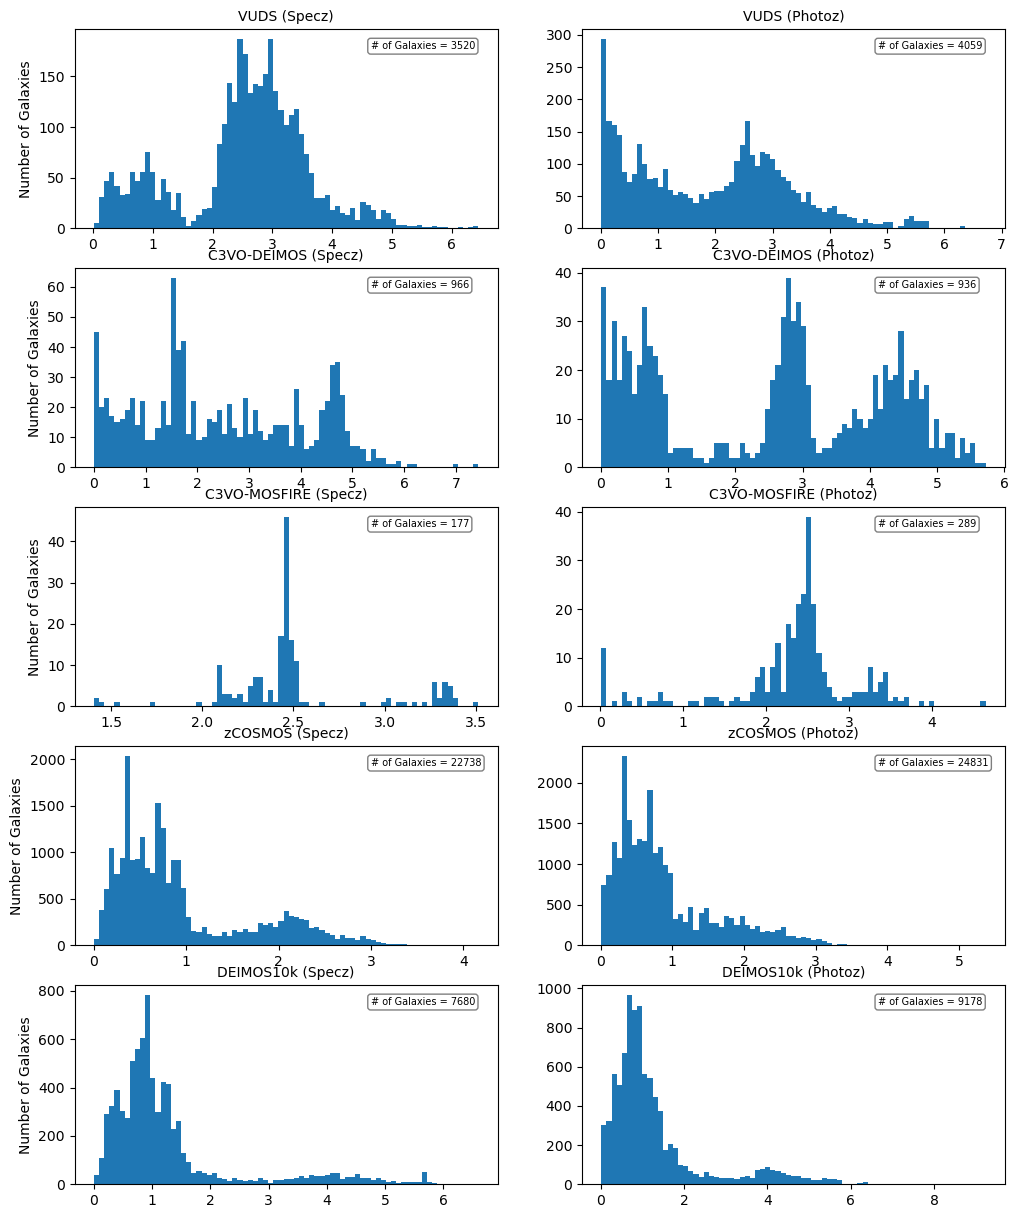

In [5]:
### Redshift Distribution per survey ###
surveys = ["VUDS", "C3VO-DEIMOS", "C3VO-MOSFIRE", "zCOSMOS", "DEIMOS10k"]


fig, ax = plt.subplots(len(surveys),2)
fig.set_size_inches(12,15)


for plot_idx, survey in enumerate(surveys):

    specz = np.where((specz_cat[:,11] > 0) & (specz_cat[:,2]== survey))
    photz = np.where((specz_cat[:,12] > 0)  & (specz_cat[:,2] == survey))

    ax[plot_idx][0].hist(specz_cat[:,11][specz], bins=75)
    if plot_idx == len(surveys): ax[plot_idx][0].set_xlabel("z")
    ax[plot_idx][0].set_ylabel("Number of Galaxies")
    ax[plot_idx][0].set_title(f"{survey} (Specz)", fontsize=10)
    bbox = dict(boxstyle='round', fc = "white", ec='k', alpha=0.5)
    ax[plot_idx][0].text(0.7, 0.9, f"# of Galaxies = {len(specz_cat[:,11][specz])}", fontsize=7,
                        bbox=bbox,transform=ax[plot_idx][0].transAxes)

    ax[plot_idx][1].hist(specz_cat[:,12][photz], bins=75)
    if plot_idx == len(surveys): ax[plot_idx][1].set_xlabel("z")
    ax[plot_idx][1].set_title(f"{survey} (Photoz)", fontsize=10)
    bbox = dict(boxstyle='round', fc = "white", ec='k', alpha=0.5)
    ax[plot_idx][1].text(0.7, 0.9, f"# of Galaxies = {len(specz_cat[:,12][photz])}", fontsize=7,
                        bbox=bbox,transform=ax[plot_idx][1].transAxes)

plt.show()